In [21]:
import index
import yaml
import sys
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from tools import *
sys.path.insert(1, '../../')
from aqua import Reader

In [18]:
namelist = load_namelist()
config   = load_config()
diagname = 'teleconnections'

In [9]:
def set_layout(fig, ax,title=None,xlabel=None,ylabel=None,xlog=False,ylog=False):
    """
    Set the layout of the plot

    Args:
        fig (Figure):           Figure object
        ax (Axes):              Axes object
        title (str,opt):        title of the plot
        xlabel (str,opt):       label of the x axis
        ylabel (str,opt):       label of the y axis
        xlog (bool,opt):        enable or disable x axis log scale, default is False
        ylog (bool,opt):        enable or disable y axis log scale, default is False

    Returns:
        fig (Figure):           Figure object
        ax (Axes):              Axes object
    """
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if xlog:
        ax.set_xscale('symlog')
    if ylog:
        ax.set_yscale('symlog')
    return fig, ax

In [77]:
def index_plot(indx,title=None,xlabel=None,ylabel=None,xlog=False,ylog=False):
    """
    Index plot together with red line at indx=0

    Args:
        indx (DataArray): Index DataArray
    
    Returns:
    """
    # 1. -- Generate the figure --
    fig, ax = plt.subplots(figsize=(12, 8))

    # 2. -- Plot the index --
    colors = ['red' if (value > 0) else 'blue' for value in indx.values]
    #indx_pos = indx.where(indx>=0)
    #indx_neg = indx.where(indx<0)
    #indx_pos.plot(ax=ax, ds='steps', color='red')
    #indx_neg.plot(ax=ax, ds='steps', color='blue')
    colorsnp = np.array(colors)
    indx.plot.scatter(ax=ax,color=colors)#,ds='steps')#,color=colorsnp)
    #indx.plot(ax=ax, ds='steps', color='blue', where=indx<0)
    #indx.plot(ax=ax, ds='steps', color='orange', where=indx>=0)
    ax.hlines(y=0,xmin=min(indx['time']),xmax=max(indx['time']),
              color='black')
    
    # 3. -- Set the layout --
    set_layout(fig, ax, title=title, xlabel=xlabel, ylabel=ylabel, xlog=xlog, ylog=ylog)

    return fig, ax

In [33]:
telecname = 'NAO'
fieldname = namelist[telecname]['field']

In [20]:
infile = config[diagname][telecname]['input']
field = xr.open_mfdataset(infile)[fieldname]

In [22]:
NAO = index.station_based_index(field,namelist,telecname)

/work/users/mnurisso/mambaforge/envs/teleconnections/lib/python3.10/site-packages/xarray/core/indexing.py:1372: PerformanceWarning: Slicing with an out-of-order index is generating 43 times more chunks
  return self.array[key]


(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'test'}, xlabel='time', ylabel='index'>)

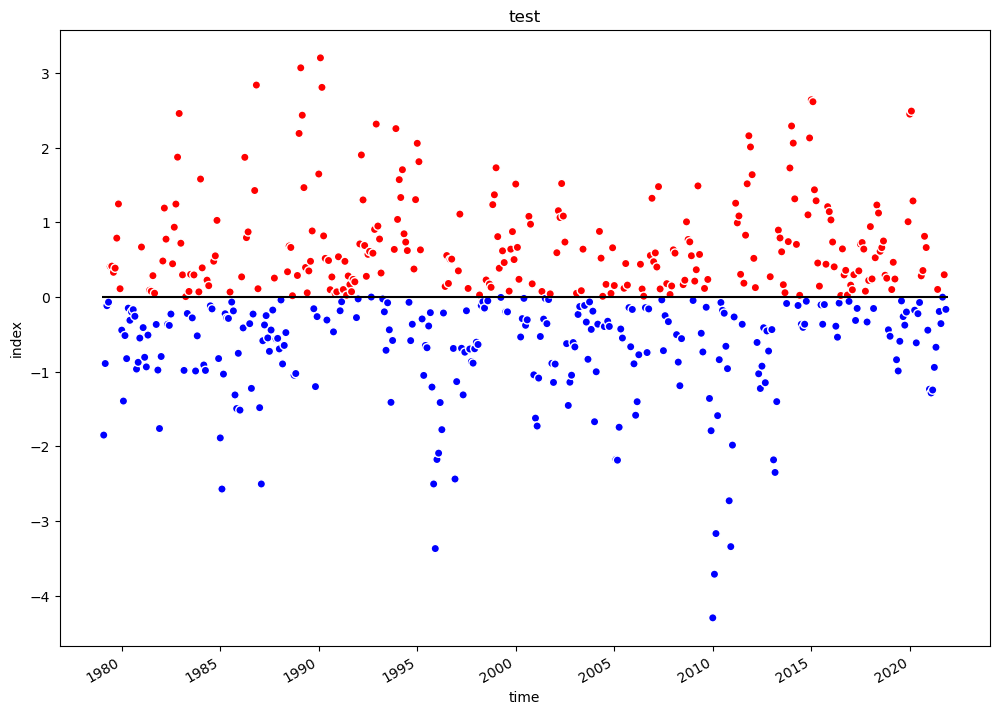

In [78]:
index_plot(NAO,title='test')

In [70]:
type(colors)

list

In [ ]:
colorsnp = np.array(colors)
type(colorsnp)

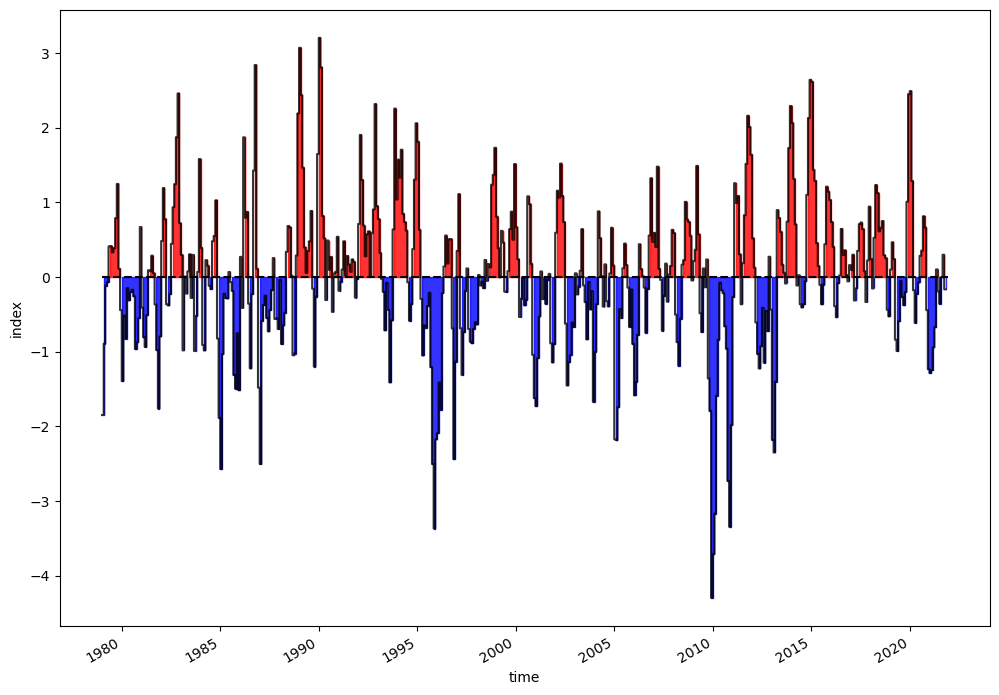

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))

# 2. -- Plot the index --
colors = ['red' if (value > 0) else 'blue' for value in NAO.values]
#indx_pos = indx.where(indx>=0)
#indx_neg = indx.where(indx<0)
#indx_pos.plot(ax=ax, ds='steps', color='red')
#indx_neg.plot(ax=ax, ds='steps', color='blue')

#NAO.plot.scatter(ax=ax,color=colors)
plt.fill_between(NAO.time,NAO.values,where=NAO.values>=0, step="pre", 
                 alpha=0.6,color='red')
plt.fill_between(NAO.time,NAO.values,where=NAO.values<0, step="pre",
                 alpha=0.6,color='blue')
NAO.plot.step(ax=ax,color='black',alpha=0.8)
#indx.plot(ax=ax, ds='steps', color='blue', where=indx<0)
#indx.plot(ax=ax, ds='steps', color='orange', where=indx>=0)
ax.hlines(y=0,xmin=min(NAO['time']),xmax=max(NAO['time']),
            color='black')

# 3. -- Set the layout --
#set_layout(fig, ax, title=title, xlabel=xlabel, ylabel=ylabel, xlog=xlog, ylog=ylog)
